In [1]:
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
import pandas as pd

In [25]:
def read_data(file_name):
    locations = []
    with open(file_name, 'r') as f:
        for line in f:
            longitude, latitude = map(float, line.strip().split(' '))
            locations.append((longitude, latitude))
    return np.array(locations)

In [3]:
def save_output(cluster_labels, output_file):
    with open(output_file, 'w') as f:
        for location_id, label in enumerate(cluster_labels):
            f.write(f"{location_id} {label}\n")

In [4]:
locations = read_data("place.txt")

<AxesSubplot:xlabel='0', ylabel='1'>

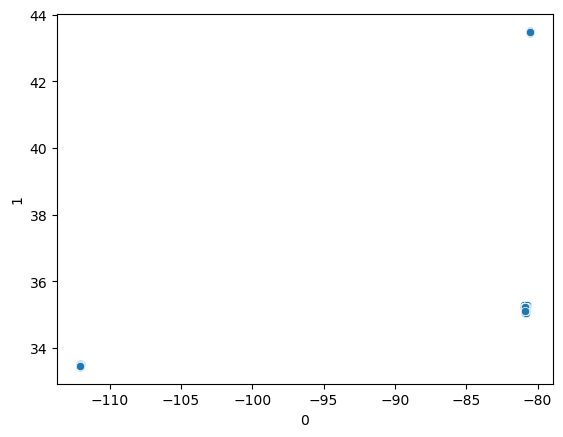

In [20]:
df = pd.DataFrame(locations)
sns.scatterplot(x = df[0], y = df[1])

In [32]:
kmeans = KMeans(n_clusters=3, random_state=42, max_iter=500) 
kmeans.fit(locations)

C:\Users\nitin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(max_iter=500, n_clusters=3, random_state=42)

In [33]:
cluster_labels = kmeans.labels_
print(cluster_labels)

[0 0 0 0 1 1 2 0 0 2 0 2 1 0 2 2 2 0 2 1 1 1 1 2 0 1 0 1 0 0 1 2 0 0 0 2 1
 0 1 2 2 2 2 2 2 1 0 2 0 0 1 2 0 2 1 2 0 2 1 2 0 1 2 0 1 2 2 0 1 2 1 0 2 1
 0 0 0 2 1 0 0 2 0 1 0 0 1 0 1 0 1 1 0 1 1 1 2 2 0 0 0 1 0 0 2 2 0 1 0 0 1
 2 0 1 0 0 1 0 1 1 2 2 0 1 2 1 2 1 2 1 2 1 2 0 0 1 1 0 0 1 2 2 0 1 2 2 2 0
 2 2 1 2 2 1 1 1 1 1 2 2 1 0 1 0 2 1 1 1 1 1 1 0 0 2 2 0 1 2 2 1 0 1 2 2 1
 2 2 1 0 1 2 2 0 0 0 2 0 0 2 0 1 0 2 0 1 2 0 1 2 2 1 2 2 0 1 1 0 1 0 1 0 1
 1 1 2 2 2 0 2 0 0 2 2 1 1 2 0 2 0 2 0 0 2 2 2 2 2 2 2 0 2 2 1 1 1 1 2 0 2
 0 1 0 2 1 1 0 1 0 1 0 1 2 0 2 1 1 0 0 1 1 2 2 2 2 1 1 2 1 1 0 1 0 2 0 1 0
 0 0 1 0]


In [34]:
save_output(cluster_labels, "clusters.txt")

In [35]:
output = read_data("clusters.txt")

In [36]:
x = [row[0] for row in locations]
y = [row[1] for row in locations]
color = [row[1] for row in output]

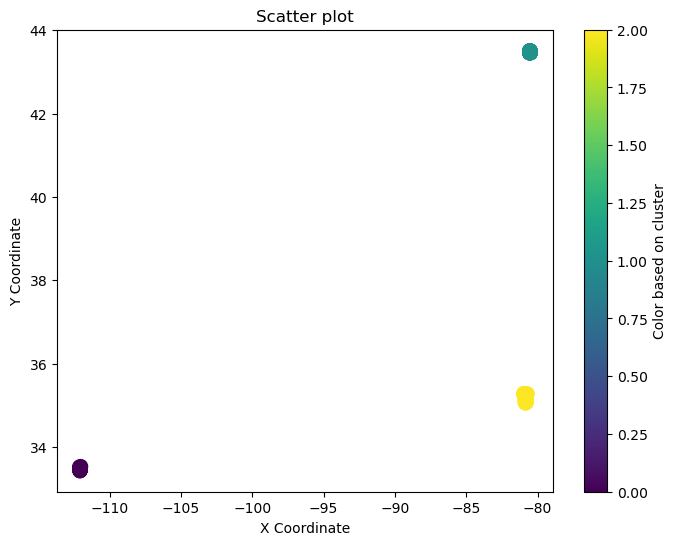

In [37]:
plt.figure(figsize=(8, 6))
plt.scatter(x, y, c=color, cmap='viridis', s=100)
plt.colorbar(label='Color based on cluster')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Scatter plot')
plt.show()